## Bibliotecas

In [ ]:
# -------------------------------------------------------
# TensorFlow Keras
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy, BinaryAccuracy, BinaryCrossentropy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.wrappers.scikit_learn import KerasClassifier
# -------------------------------------------------------
# Scikit-Learn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
# -------------------------------------------------------
# Vario
from numpy import loadtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# -------------------------------------------------------


## Cargar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Descargar el dataset

In [ ]:
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn
# PATH = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
PATH = '/content/drive/MyDrive/BD/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Preparación de los datos

In [ ]:
df = pd.read_csv(PATH)
print(len(df))
df.head().T

7043


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,0.0
753,3115-CZMZD,0.0
936,5709-LVOEQ,0.0
1082,4367-NUYAO,0.0
1340,1371-DWPAZ,0.0
3331,7644-OMVMY,0.0
3826,3213-VVOLG,0.0
4380,2520-SGTTA,0.0
5218,2923-ARZLG,0.0
6670,4075-WKNIU,0.0


In [ ]:
replacer = lambda str: str.lower().str.replace(' ', '_')
df.columns = replacer(df.columns.str)
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = replacer(df[col].str)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=1)
y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

df_train.head().T

,4204,7034,5146,5184,1310
customerid,4395-pzmsn,0639-tsiqw,3797-fkogq,7570-welny,6393-wryze
gender,male,female,male,female,female
seniorcitizen,1,0,0,0,0
partner,no,no,no,yes,yes
dependents,no,no,yes,no,no
tenure,5,67,11,68,34
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,yes,yes,yes,yes
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,fiber_optic
onlinesecurity,no,yes,no,yes,no


# Análisis de la importancia de las propiedades

In [ ]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [ ]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print(round(female_mean, 3))
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print(round(male_mean, 3))

0.277
0.263


In [ ]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print(round(partner_yes, 3))
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print(round(partner_no, 3))

0.205
0.33


In [ ]:
from sklearn.metrics import mutual_info_score

calculate_mi = lambda col: mutual_info_score(col, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [ ]:
print(df_train_full[numerical].corrwith(df_train_full.churn))

print(round(df_train_full[df_train_full.tenure <= 2].churn.mean(), 3))
print(round(df_train_full[(df_train_full.tenure > 3) & 
                          (df_train_full.tenure <= 12)].churn.mean(), 3))
print(round(df_train_full[df_train_full.tenure > 12].churn.mean(), 3))

print(round(df_train_full[df_train_full.monthlycharges < 20].churn.mean(), 3))
print(round(df_train_full[(df_train_full.monthlycharges > 21) & 
                          (df_train_full.monthlycharges <= 50)].churn.mean(), 3))
print(round(df_train_full[df_train_full.monthlycharges > 50].churn.mean(), 3))

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64
0.595
0.391
0.176
0.088
0.223
0.325


# Ingeniería de propiedades

In [ ]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'contract': 'month-to-month',
 'dependents': 'no',
 'deviceprotection': 'no',
 'gender': 'male',
 'internetservice': 'fiber_optic',
 'monthlycharges': 85.55,
 'multiplelines': 'no',
 'onlinebackup': 'yes',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'no',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 1,
 'streamingmovies': 'yes',
 'streamingtv': 'no',
 'techsupport': 'no',
 'tenure': 5,
 'totalcharges': 408.5}

In [ ]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [ ]:
X_train = dv.transform(train_dict)
X_train[0]

array([  1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   0.  ,  85.55,   1.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   5.  , 408.5 ])

In [ ]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

# Entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred

array([[0.99142714, 0.00857286],
       [0.79028712, 0.20971288],
       [0.78364454, 0.21635546],
       ...,
       [0.35664296, 0.64335704],
       [0.81055916, 0.18944084],
       [0.87261929, 0.12738071]])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00857286, 0.20971288, 0.21635546, ..., 0.64335704, 0.18944084,
       0.12738071])

In [ ]:
churn = y_pred >= 0.5
churn

array([False, False, False, ...,  True, False, False])

In [ ]:
# precisión del modelo con los datos de entrenamiento
round((y_val == churn).mean(), 3) 

0.805

# Modelo

In [ ]:
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred

array([[0.99142714, 0.00857286],
       [0.79028712, 0.20971288],
       [0.78364454, 0.21635546],
       ...,
       [0.35664296, 0.64335704],
       [0.81055916, 0.18944084],
       [0.87261929, 0.12738071]])



---



---



---



---



# Ejercicio: usar este dataset para entrenar una red neuronal

## Instalación de paquetes y biblotecas

### Instalación

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bibliotecas

In [ ]:
import pandas as pd
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np



---



### Dataset

* X_train
* y_train
* X_val
* y_val

In [ ]:
# Número de atributos del conjunto de entrenamiento
X_train.shape

(3774, 45)

In [ ]:
# from keras.optimizers import Adam

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

### Entrenar el modelo

***LearningRateScheduler***

Para que la tasa de entrenamiento sea cada vez menor

In [ ]:
# from keras.callbacks import LearningRateScheduler

# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
    initial_lr = 0.03
    drop = 0.5
    epochs_drop = 250
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(45, input_shape=(45,), activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 45)                2070      
                                                                 
 dense_40 (Dense)            (None, 45)                2070      
                                                                 
 dense_41 (Dense)            (None, 1)                 46        
                                                                 
Total params: 4,186
Trainable params: 4,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# from keras.optimizers import Adam

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
# compile the keras model
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy', 'mse']
)

In [ ]:
# fit the keras model on the dataset
history = model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=500,
    batch_size=256,
    verbose=0
)

### Medir la precisión del modelo

In [ ]:
# evaluate the keras model
_, accuracy, mse = model.evaluate(X_val, y_val)
print('Accuracy: %.2f' % (accuracy*100))
print('MSE: %.4f' % (mse))

59/59 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.8005 - mse: 0.1446
Accuracy: 80.05
MSE: 0.1446


## Representación gráfica

dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])


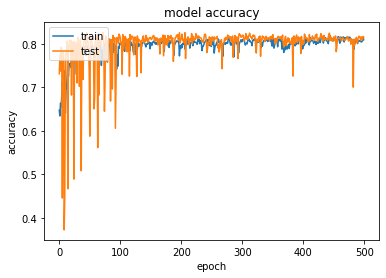

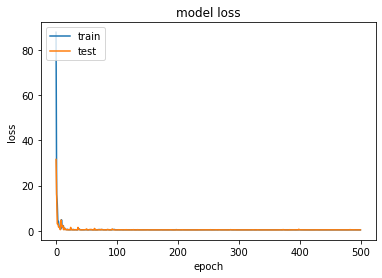

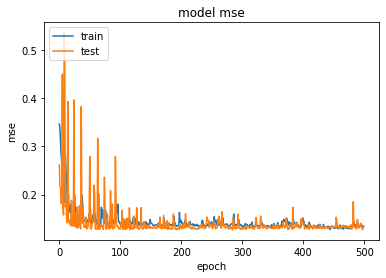

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for mse
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



---



---



---



## . . .





# Ejercicio: usar este dataset para entrenar una red neuronal con dos nodos de salida

## Conceptos teóricos

> * [Machine Learning Glossary](https://developers.google.com/machine-learning/glossary?hl=en)

> * [Tutorial de problema de clasificación multiclase con Redes Neuronales usando Keras](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)

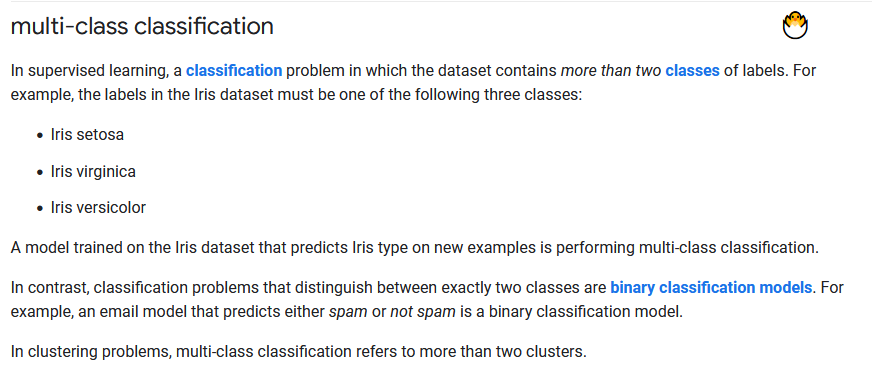

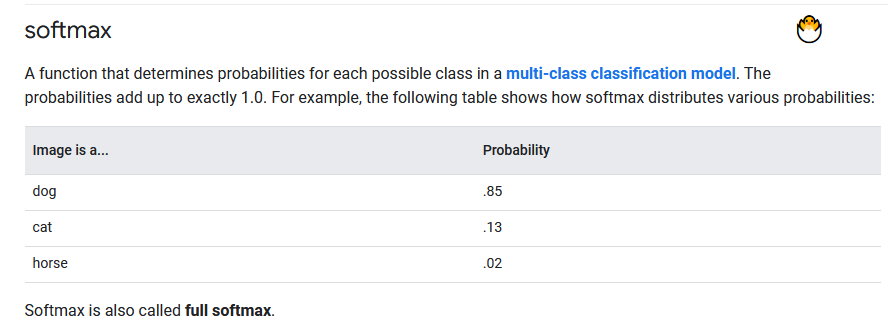

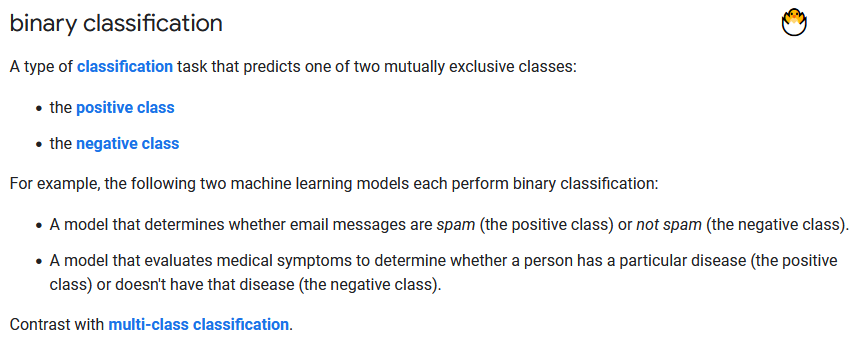

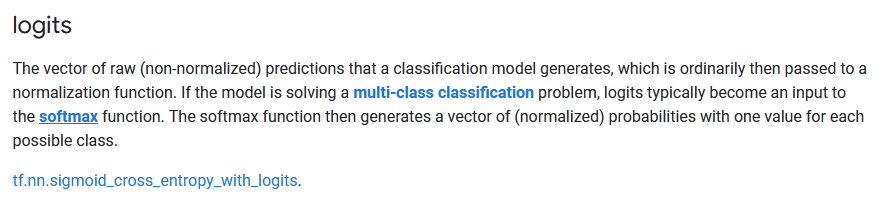

## Cargar (otra vez) el dataset

In [ ]:
df3 = pd.read_csv(PATH)

In [ ]:
print(len(df3))

7043


## Pre-proceso

In [ ]:
total_charges = pd.to_numeric(df3.TotalCharges, errors='coerce')
df3.TotalCharges = pd.to_numeric(df3.TotalCharges, errors='coerce')
df3.TotalCharges = df3.TotalCharges.fillna(0)
df3[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,0.0
753,3115-CZMZD,0.0
936,5709-LVOEQ,0.0
1082,4367-NUYAO,0.0
1340,1371-DWPAZ,0.0
3331,7644-OMVMY,0.0
3826,3213-VVOLG,0.0
4380,2520-SGTTA,0.0
5218,2923-ARZLG,0.0
6670,4075-WKNIU,0.0


In [ ]:
replacer = lambda str: str.lower().str.replace(' ', '_')
df3.columns = replacer(df3.columns.str)
for col in list(df3.dtypes[df3.dtypes == 'object'].index):
    df3[col] = replacer(df3[col].str)
df3.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Convertir el atributo 'churn' en dos columnas complementarias

Cambiar el tido de dato de la columna 'churn' de booleano a número entero

In [ ]:
df3.churn = (df3.churn == 'yes').astype(int)
df3.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

Creamos dos columnas a partir del atributo 'churn'

In [ ]:
df4 = (df3.churn == 1).astype(int)
df5 = (df3.churn == 0).astype(int)

Cambiamos el nombre de las nuevas columnas

In [ ]:
df4.name = 'churn_true'
df4.head()

0    0
1    0
2    1
3    0
4    1
Name: churn_true, dtype: int64

In [ ]:
df5.name = 'churn_false'
df5.head()

0    1
1    1
2    0
3    1
4    0
Name: churn_false, dtype: int64

Quitamos la antigua columna `churn`

In [ ]:
df6 = df3.copy()
df6.drop(columns=['churn'], inplace=True)

Unimos las dos nuevas columnas al dataframe principal

In [ ]:
df6 = pd.concat([df3, df4, df5], axis=1)

## División de los atributos entre numéricos y categóricos

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df6[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Separación de datos: prueba y entrenamiento

In [ ]:
# from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df6, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=1)
y_train = df_train[['churn_true', 'churn_false']]
y_val = df_val[['churn_true', 'churn_false']]


df_train.drop(columns=['churn_true', 'churn_false'], inplace=True)
df_val.drop(columns=['churn_true', 'churn_false'], inplace=True)

df_train.head().T

,4204,7034,5146,5184,1310
customerid,4395-pzmsn,0639-tsiqw,3797-fkogq,7570-welny,6393-wryze
gender,male,female,male,female,female
seniorcitizen,1,0,0,0,0
partner,no,no,no,yes,yes
dependents,no,no,yes,no,no
tenure,5,67,11,68,34
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,yes,yes,yes,yes
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,fiber_optic
onlinesecurity,no,yes,no,yes,no


In [ ]:
y_val

,churn_true,churn_false
565,0,1
199,0,1
6738,0,1
2504,1,0
556,0,1
...,...,...
170,0,1
4321,0,1
650,1,0
254,0,1


## Ingeniería de propiedades

In [ ]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'contract': 'month-to-month',
 'dependents': 'no',
 'deviceprotection': 'no',
 'gender': 'male',
 'internetservice': 'fiber_optic',
 'monthlycharges': 85.55,
 'multiplelines': 'no',
 'onlinebackup': 'yes',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'no',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 1,
 'streamingmovies': 'yes',
 'streamingtv': 'no',
 'techsupport': 'no',
 'tenure': 5,
 'totalcharges': 408.5}

In [ ]:
# from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [ ]:
X_train = dv.transform(train_dict)
X_train[0]

array([  1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   0.  ,  85.55,   1.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   5.  , 408.5 ])

In [ ]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

Encoding the validation data with DictVectorizer:

In [ ]:
X_val = dv.transform(val_dict)

## Definir el optimizador del modelo (para Red Neuronal)

In [ ]:
# from keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

## LearningRateScheduler

Para que la tasa de entrenamiento sea cada vez menor

In [ ]:
# from keras.callbacks import LearningRateScheduler

# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.25
    epochs_drop = 250
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

## Definir el modelo

[First: setting the model's metric](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [ ]:
metric = Accuracy(
    name='accuracy', dtype=None
)


Baseline model function

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(45, input_shape=(45,), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics = ['accuracy']
    )
    return model

Setting the model's estimator

In [ ]:
# define the keras model
estimator = KerasClassifier(
    build_fn=baseline_model,
    epochs=500,
    batch_size=128,
    verbose=0
)

<ipython-input-200-f53af6107f7c>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(


## Entrenar y evaluar el modelo con validación cruzada: CROSS_VAL_SCORE

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

In [ ]:
print("Baseline score: %.2f%% Std: (%.2f%%)" % \
    (results.mean()*100, results.std()*100))

Baseline score: 78.01% Std: (3.21%)


### Resultados:

#### Combinación nº 1
---

PARÁMETROS

> * Learning_rate = `0.001`

> * Initial_lr = `0.001`

> * Drop = `0.25`

> * Epochs_drop = `250`

> * Second layer (input) = `45` (input variable shape = 45)

> * Second layer (hidden) = `16`

> * Batch size = `128`

> * Loss = `'categorical_crossentropy'`

> * Metric = `accuracy`

---

Accuracy score: `76.29%`

Stardard deviation: `4.88%`



---



---



# Repetir el ejercicio pero entrenando el modelo con `.fit()`

## Definir el optimizador del modelo (para Red Neuronal)

In [ ]:
# from keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

## LearningRateScheduler

Para que la tasa de entrenamiento sea cada vez menor

In [ ]:
# from keras.callbacks import LearningRateScheduler

# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.25
    epochs_drop = 250
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

## Definir el modelo

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(45, input_shape=(45,), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(
        loss ='categorical_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )
    return model

In [ ]:
# Creating a model's object
model = baseline_model()

## Entrenar el modelo con los mejores hiperparámetros

In [ ]:
# Entrenar el modelo
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs = 100,
    batch_size = 128,
    verbose = 0
)

## Obtener las predicciones a partir de los datos de prueba

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)
y_pred

59/59 [==============================] - 0s 2ms/step


array([[0.05022753, 0.9497725 ],
       [0.4499143 , 0.55008566],
       [0.38876528, 0.6112348 ],
       ...,
       [0.5617901 , 0.43820992],
       [0.12804501, 0.871955  ],
       [0.07922301, 0.92077696]], dtype=float32)

## Medir la precisión del modelo *1*

Usamos la función 'scoring' interna del modelo aplicada a los datos de prueba divididos entre variables de entrada y de salida.

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_val, y_val)
print('Accuracy: %.2f' % (accuracy*100))

59/59 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.6656
Accuracy: 66.56


## Medir la precisión del modelo *2*

> Obtenemos, para cada registro del dataset (fila) cuál de las dos clases de salida tiene una probabilidad mayor de ocurrir y construimos, con ella, la variable de salida predicha.

> Posteriormente medimos, con esta nueva variable de salida (también denominada 'target', 'output variable' o variable objetivo) la precisión del modelo "a mano" comparando los datos predichos con los reales (columna "churn" original del dataset, `df3.churn`)


In [ ]:
y_pred[0]

array([0.05022753, 0.9497725 ], dtype=float32)

In [ ]:
# output = list()
# for i in range(len(y_pred)):
#     if y_pred[i][0] >= y_pred[i][1]:
#         output.append([1])
#     else:
#         output.append([0])

In [ ]:
y_pred_list = [(y_pred[i][0] >= y_pred[i][1]).astype(int) for i in range(len(y_pred))]

In [ ]:
y_pred_list[:15]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

Showing true "churn" label

In [ ]:
y_true_list = y_val.churn_true.to_list()

In [ ]:
y_true_list[:15]

[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

Computing model's accuracy with custom coding

In [ ]:
from statistics import mean

acc = mean([y_pred_list[i] == y_true_list[i] for i in range(len(y_true_list))])

print(f'La precisión de la predicción es: <{round(acc*100, 2)}%>')

La precisión de la predicción es: <66.56%>


Observamos que se ha obtenido la misma precisión que utilizando la métrica interna del modelo.

## Visualización de resultados

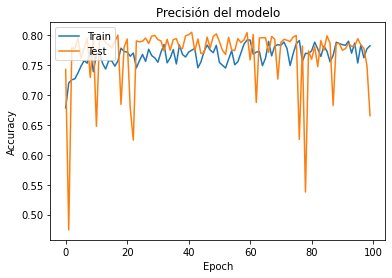

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

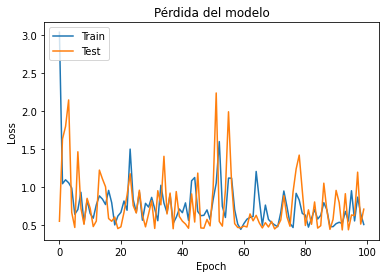

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualización del modelo
Para visualizar el modelo y sus neuronas con matplotlib podemos utilizar la función plot_model de Keras, que nos permite generar una imagen del modelo. Además, también podemos utilizar la librería pyplot de matplotlib para visualizar la estructura del modelo y sus neuronas.

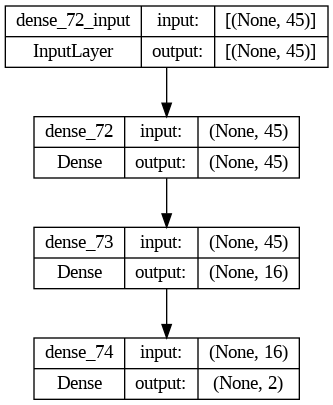

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Esto generará una imagen del modelo en un archivo llamado "model.png" y mostrará las formas y nombres de las capas.

Para visualizar la estructura del modelo y sus neuronas utilizando pyplot, podemos hacer lo siguiente:

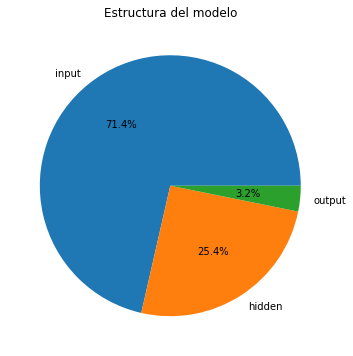

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
# layer_names = [layer.name for layer in model.layers]

layer_names = ['input', 'hidden', 'output']

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

### Resultados:

#### Combinación nº 1
---

PARÁMETROS

> * Learning_rate = `0.001`

> * Initial_lr = `0.001`

> * Drop = `0.25`

> * Epochs_drop = `250`

> * Second layer (input) = `45` (input variable shape = 45)

> * Second layer (hidden) = `16`

> * Batch size = `128`

> * Loss = `'categorical_crossentropy'`

> * Metric = `accuracy`

---

Accuracy score:
`77.47%`



---



---



---

